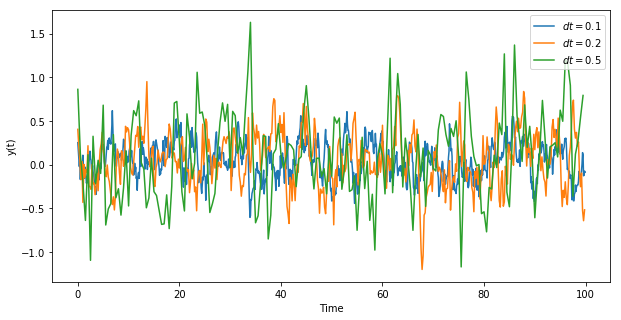

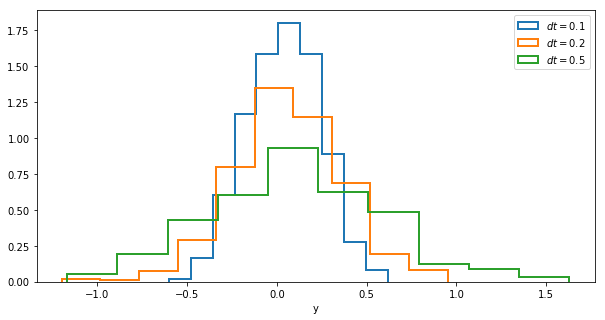

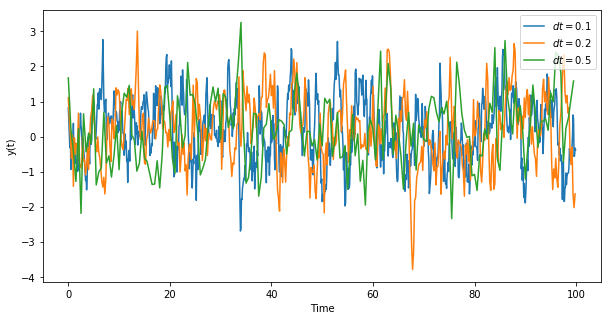

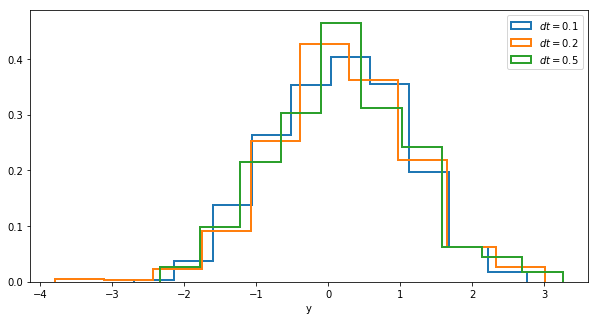

In [108]:

import numpy as np
import matplotlib.pyplot as plt

def field1(t,y,dt):
    ''' here the variance of the noise does depend on dt'''
    noise = np.random.normal(0,1)
    return -y +  sigma * noise

def field2(t,y,dt):
    '''here the variance of the noise does not depend on dt'''
    noise = np.random.normal(0,1)
    return -y +  np.sqrt(2 * dt) * (sigma/dt) * noise


def euler1(d_t, y0):
    ''' euler method where the variance does depend on dt'''
    np.random.seed(1)
    y = y0
    sol = []
    time = np.arange(0,T, d_t)
    for t in time:
        y=y + d_t*field1(t, y, d_t)
        sol.append(y)
    sol =np.array(sol)
    return sol

def euler2(d_t, y0):
    '''euler method  where the variance does not depend on dt'''
    np.random.seed(1)
    y = y0
    sol = []
    time = np.arange(0,T, d_t)
    for t in time:
        y=y + d_t*field2(t, y, d_t)
        sol.append(y)
    sol =np.array(sol)
    return sol

sigma = 1.
T=100
the_sol = []
the_times = []
the_dt = [.1,.2,.5]
y0 = .1
for dt in the_dt:
    time = np.arange(0,T, dt)
    sol_euler1 = euler1(dt, y0)
    the_sol.append(sol_euler1)
    the_times.append(time)
l = 0
for time,sol in zip(the_times,the_sol):    
    plt.plot(time, sol, label = r'$dt=$'+str(the_dt[l]))
    l+=1
plt.legend(loc = 'upper right')
plt.xlabel('Time')
plt.ylabel('y(t)')
plt.show()
l=0
for time,sol in zip(the_times,the_sol):    
    plt.hist(sol, density=True, histtype ='step',lw=2, label=r'$dt=$'+str(the_dt[l]))
    l+=1
plt.legend(loc='upper right')
plt.xlabel('y')
plt.show()

#-----------------------


the_sol = []
the_times = []
for dt in the_dt:
    time = np.arange(0,T, dt)
    sol_euler2 = euler2(dt, y0)
    the_sol.append(sol_euler2)
    the_times.append(time)
l = 0
for time,sol in zip(the_times,the_sol):    
    plt.plot(time, sol, label = r'$dt=$'+str(the_dt[l]))
    l+=1
plt.legend(loc = 'upper right')
plt.xlabel('Time')
plt.ylabel('y(t)')
plt.show()
l=0
for time,sol in zip(the_times,the_sol):    
    plt.hist(sol,density=True, histtype ='step',lw=2, label=r'$dt=$'+str(the_dt[l]))
    l+=1
plt.legend(loc='upper right')
plt.xlabel('y')
plt.show()
